In [1141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [1142]:
df = pd.read_csv("titanic/train.csv")

In [1143]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove unwanted columns

In [1144]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1) #axis is required

In [1145]:
df
from numpy import nan

In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [1147]:
df = df.drop(['Cabin'], axis=1) #axis is required

In [1148]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Filling missing values in age by average age of males and females

In [1149]:
df.dropna(subset=['Embarked'], inplace=True)

In [1150]:
# df['Embarked'].unique()
# df[df['Embarked'].isna()].index
# df.drop([61, 829], axis =0, inplace=True)

In [1151]:
df.reset_index(drop=True, inplace=True)

In [1152]:
mean_all = df['Age'].mean()
mean_all

29.64209269662921

In [1153]:
mean_male = df[df['Sex'] == 'male']['Age'].mean()
mean_male

30.72664459161148

In [1154]:
mean_female = df[df['Sex'] == 'female']['Age'].mean()
mean_female

27.745173745173744

In [1155]:
men_nan_index_list = df[(df['Age'].isna()) & (df['Sex'] == 'male')]['Age'].index

In [1156]:
men_nan_index_list

Int64Index([  5,  17,  26,  29,  36,  42,  45,  46,  48,  55,
            ...
            824, 825, 827, 830, 835, 837, 844, 857, 866, 876],
           dtype='int64', length=124)

In [1157]:
for i in men_nan_index_list:
    df.iloc[i, 3:4] = mean_male

In [1158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       836 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [1159]:
women_nan_index_list = df[(df['Age'].isna()) & (df['Sex'] == 'female')]['Age'].index
for i in women_nan_index_list:
    df.iloc[i, 3:4] = mean_female

In [1160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Outlier

<AxesSubplot:>

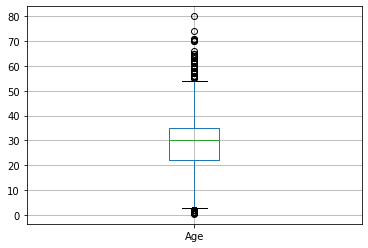

In [1161]:
df.boxplot(column=['Age'])

In [1162]:
df['Sex'].replace(to_replace = 'male', value = 1, inplace=True)
df['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

In [1163]:
one = pd.get_dummies(df['Embarked'])
df = pd.concat([df, one], axis=1)

In [1164]:
df.drop(['Embarked'], axis=1, inplace=True)

In [1165]:
df.drop(['Q'], axis=1, inplace=True)

In [1166]:
one_pclass = pd.get_dummies(df['Pclass'])
df = pd.concat([df, one_pclass], axis=1)
df.drop(['Pclass'], axis=1, inplace=True)

In [1167]:
df.drop([2], axis=1, inplace=True)

In [1168]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,C,S,1,3
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,1,0,1,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,1,1,0
4,0,1,35.0,0,0,8.0500,0,1,0,1


In [1169]:
category = pd.cut(df.Age,bins=[0,12,40,70,99],labels=['Child', "Adult", "old", 'Elderly'])
df['age_group'] = category
one = pd.get_dummies(df['age_group'])
df = pd.concat([df, one], axis=1)
df

,Survived,Sex,Age,SibSp,Parch,Fare,C,S,1,3,age_group,Child,Adult,old,Elderly
0,0,1,22.000000,1,0,7.2500,0,1,0,1,Adult,0,1,0,0
1,1,0,38.000000,1,0,71.2833,1,0,1,0,Adult,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,1,0,1,Adult,0,1,0,0
3,1,0,35.000000,1,0,53.1000,0,1,1,0,Adult,0,1,0,0
4,0,1,35.000000,0,0,8.0500,0,1,0,1,Adult,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,27.000000,0,0,13.0000,0,1,0,0,Adult,0,1,0,0
885,1,0,19.000000,0,0,30.0000,0,1,1,0,Adult,0,1,0,0
886,0,0,27.745174,1,2,23.4500,0,1,0,1,Adult,0,1,0,0
887,1,1,26.000000,0,0,30.0000,1,0,1,0,Adult,0,1,0,0


In [1170]:
max(df.Fare)

512.3292

In [1171]:
# "dsfs" =

In [1172]:
category = pd.cut(df.Fare,bins=[-1,50,150,513],labels=['low', "mid", "high"])
print(category)
df['Fare_group'] = category
one = pd.get_dummies(df['Fare_group'])
df = pd.concat([df, one], axis=1)

0      low
1      mid
2      low
3      mid
4      low
      ... 
884    low
885    low
886    low
887    low
888    low
Name: Fare, Length: 889, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']


In [1173]:
category = pd.cut(df.SibSp,bins=[-2,2,4,99],labels=['alone', "with", "group"])
print(category)
df['SibSp_group'] = category
one = pd.get_dummies(df['SibSp_group'])
df = pd.concat([df, one], axis=1)

0      alone
1      alone
2      alone
3      alone
4      alone
       ...  
884    alone
885    alone
886    alone
887    alone
888    alone
Name: SibSp, Length: 889, dtype: category
Categories (3, object): ['alone' < 'with' < 'group']


In [1174]:
df.corr()

,Survived,Sex,Age,SibSp,Parch,Fare,C,S,1,3,Child,Adult,old,Elderly,low,mid,high,alone,with,group
Survived,1.000000,-0.541585,-0.085832,-0.034040,0.083151,0.255290,0.169966,-0.151777,0.282368,-0.320171,0.117741,-0.057165,-0.013024,-0.028235,-0.281980,0.247512,0.116078,0.110686,-0.072452,-0.092054
Sex,-0.541585,1.000000,0.109665,-0.116348,-0.247508,-0.179958,-0.084520,0.121405,-0.093142,0.134227,-0.068566,0.013650,0.022631,0.055303,0.182176,-0.138696,-0.117049,0.051668,-0.062274,0.004319
Age,-0.085832,0.109665,1.000000,-0.236473,-0.181569,0.086150,0.033541,-0.016809,0.315276,-0.277980,-0.556877,-0.293565,0.695896,0.252822,-0.154577,0.161956,0.011539,0.274028,-0.271735,-0.074389
SibSp,-0.034040,-0.116348,-0.236473,1.000000,0.414542,0.160887,-0.060074,0.069438,-0.052894,0.091515,0.353797,-0.148683,-0.076066,-0.035738,-0.187202,0.192189,0.021806,-0.814322,0.543282,0.660205
Parch,0.083151,-0.247508,-0.181569,0.414542,1.000000,0.217532,-0.011588,0.061512,-0.015809,0.014634,0.368162,-0.225776,0.003510,-0.035673,-0.104271,0.030355,0.164203,-0.342660,0.254568,0.234665
Fare,0.255290,-0.179958,0.086150,0.160887,0.217532,1.000000,0.270731,-0.163758,0.590576,-0.411932,-0.003272,-0.075259,0.092149,-0.009327,-0.716653,0.388726,0.771504,-0.094146,0.069038,0.065979
C,0.169966,-0.084520,0.033541,-0.060074,-0.011588,0.270731,1.000000,-0.782613,0.299472,-0.154785,-0.021900,-0.005364,0.013939,0.040539,-0.234064,0.200864,0.105453,0.112759,-0.096259,-0.056465
S,-0.151777,0.121405,-0.016809,0.069438,0.061512,-0.163758,-0.782613,1.000000,-0.165022,-0.013594,0.037784,-0.053127,0.045679,-0.054604,0.128132,-0.110426,-0.056799,-0.098619,0.070491,0.072149
1,0.282368,-0.093142,0.315276,-0.052894,-0.015809,0.590576,0.299472,-0.165022,1.000000,-0.625395,-0.123998,-0.162210,0.266634,0.063203,-0.681150,0.574823,0.326133,0.095894,-0.071126,-0.065864
3,-0.320171,0.134227,-0.277980,0.091515,0.014634,-0.411932,-0.154785,-0.013594,-0.625395,1.000000,0.083623,0.170377,-0.255002,-0.023035,0.433536,-0.367683,-0.203962,-0.169463,0.132358,0.105315


In [1175]:
scaler = StandardScaler().fit(df[["SibSp", "Age", "Parch", "Fare"]])

In [1176]:
df[["SibSp", "Age", "Parch", "Fare"]] = scaler.transform(df[["SibSp", "Age", "Parch", "Fare"]])

In [1177]:
X = df.drop(['Survived', "age_group", "Fare_group", "Fare", "Age", "SibSp_group"], axis=1)
X.head()

,Sex,SibSp,Parch,C,S,1,3,Child,Adult,old,Elderly,low,mid,high,alone,with,group
0,1,0.431350,-0.474326,0,1,0,1,0,1,0,0,1,0,0,1,0,0
1,0,0.431350,-0.474326,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,-0.475199,-0.474326,0,1,0,1,0,1,0,0,1,0,0,1,0,0
3,0,0.431350,-0.474326,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4,1,-0.475199,-0.474326,0,1,0,1,0,1,0,0,1,0,0,1,0,0


In [1178]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'], test_size=0.33, random_state=42)

In [1179]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [1180]:
clf.score(X_test, y_test)

0.8163265306122449

In [1181]:
clf_Random = RandomForestClassifier(max_depth=6, random_state=0).fit(X_train, y_train)

In [1182]:
clf_Random.score(X_test, y_test)

0.8197278911564626

In [1183]:
clf_neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf_neigh.score(X_test, y_test)                                

0.7721088435374149

In [1184]:
df_test = pd.read_csv("titanic/test.csv")

In [1185]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1186]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1) #axis is required

men_nan_index_list_test = df_test[(df_test['Age'].isna()) & (df_test['Sex'] == 'male')]['Age'].index
for i in men_nan_index_list_test:
    df_test.iloc[i, 3:4] = mean_male
    
women_nan_index_list_test = df_test[(df_test['Age'].isna()) & (df_test['Sex'] == 'female')]['Age'].index
for i in women_nan_index_list_test:
    df_test.iloc[i, 3:4] = mean_female
    
df_test['Sex'].replace(to_replace = 'male', value = 1, inplace=True)
df_test['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

one_test = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, one_test], axis=1)

df_test.drop(['Embarked'], axis=1, inplace=True)

one_pclass_test = pd.get_dummies(df_test['Pclass'])
df_test = pd.concat([df_test, one_pclass_test], axis=1)
df_test.drop(['Pclass'], axis=1, inplace=True)
df_test.drop([3], axis=1, inplace=True)

df_test['Age'] = Age.transform(df_test[['Age']])
df_test['SibSp'] = SibSp.transform(df_test[['SibSp']])
df_test['Parch'] = Parch.transform(df_test[['Parch']])
# df['Fare'] = std_scale.fit_transform(df[['Fare']])

In [1187]:
df_test.head()

,Sex,Age,SibSp,Parch,C,Q,S,1,2
0,1,0.428248,0.000,0.000000,0,1,0,0,0
1,0,0.585323,0.125,0.000000,0,0,1,0,0
2,1,0.773813,0.000,0.000000,0,1,0,0,1
3,1,0.334004,0.000,0.000000,0,0,1,0,0
4,0,0.271174,0.125,0.166667,0,0,1,0,0


In [1188]:
df_test[['Age']]

,Age
0,0.428248
1,0.585323
2,0.773813
3,0.334004
4,0.271174
...,...
413,NaN
414,0.484795
415,0.478512
416,NaN


In [1189]:
Age.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.01256597]),
 'min_': array([-0.00527771]),
 'data_min_': array([0.42]),
 'data_max_': array([80.]),
 'data_range_': array([79.58])}

In [1190]:
SibSp.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.125]),
 'min_': array([0.]),
 'data_min_': array([0.]),
 'data_max_': array([8.]),
 'data_range_': array([8.])}

In [1191]:
Parch.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'n_features_in_': 1,
 'n_samples_seen_': 889,
 'scale_': array([0.16666667]),
 'min_': array([0.]),
 'data_min_': array([0.]),
 'data_max_': array([6.]),
 'data_range_': array([6.])}

In [1192]:
n_df_train = pd.read_csv("titanic/train.csv")
n_df_test = pd.read_csv("titanic/train.csv")

n_df_train = n_df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
n_df_test = n_df_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [1193]:
df[["Sex", "Age"]] = [1,2]

In [1194]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,C,S,1,3,...,old,Elderly,Fare_group,low,mid,high,SibSp_group,alone,with,group
0,0,1,2,0.431350,-0.474326,-0.500240,0,1,0,1,...,0,0,low,1,0,0,alone,1,0,0
1,1,1,2,0.431350,-0.474326,0.788947,1,0,1,0,...,0,0,mid,0,1,0,alone,1,0,0
2,1,1,2,-0.475199,-0.474326,-0.486650,0,1,0,1,...,0,0,low,1,0,0,alone,1,0,0
3,1,1,2,0.431350,-0.474326,0.422861,0,1,1,0,...,0,0,mid,0,1,0,alone,1,0,0
4,0,1,2,-0.475199,-0.474326,-0.484133,0,1,0,1,...,0,0,low,1,0,0,alone,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,2,-0.475199,-0.474326,-0.384475,0,1,0,0,...,0,0,low,1,0,0,alone,1,0,0
885,1,1,2,-0.475199,-0.474326,-0.042213,0,1,1,0,...,0,0,low,1,0,0,alone,1,0,0
886,0,1,2,0.431350,2.006119,-0.174084,0,1,0,1,...,0,0,low,1,0,0,alone,1,0,0
887,1,1,2,-0.475199,-0.474326,-0.042213,1,0,1,0,...,0,0,low,1,0,0,alone,1,0,0
